【项目07】  城市餐饮店铺选址分析

作业要求：
1、从三个维度“口味”、“人均消费”、“性价比”对不同菜系进行比较，并筛选出可开店铺的餐饮类型
要求：
① 计算出三个维度的指标得分
② 评价方法：
   口味 → 得分越高越好
   性价比 → 得分越高越好
   人均消费 → 价格适中即可
③ 制作散点图，x轴为“人均消费”，y轴为“性价比得分”，点的大小为“口味得分”
   绘制柱状图，分别显示“口味得分”、“性价比得分”
   * 建议用bokeh做图
提示：
① 数据清洗，清除空值、为0的数据
② 口味指标计算方法 → 口味评分字段，按照餐饮类别分组算均值，再做标准化处理
③ 人均消费指标计算方法 → 人均消费字段，按照餐饮类别分组算均值，再做标准化处理
④ 性价比指标计算方法 → 性价比 = （口味 + 环境 + 服务）/人均消费，按照餐饮类别分组算均值，再做标准化处理
⑤ 数据计算之前，检查一下数据分布，去除异常值（以外限为标准）
   * 这里排除了高端奢侈餐饮的数据干扰
⑥ 注意，这里先分别计算三个指标，再合并数据（merge）作图，目的是指标之间的噪音数据不相互影响
 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from bokeh.io import output_notebook
output_notebook()

from bokeh.plotting import figure,show
from bokeh.models import ColumnDataSource

Loading BokehJS ...

'''
1、从三个维度“口味”、“人均消费”、“性价比”对不同菜系进行比较，并筛选出可开店铺的餐饮类型
要求：
① 计算出三个维度的指标得分
② 评价方法：
   口味 → 得分越高越好
   性价比 → 得分越高越好
   人均消费 → 价格适中即可
③ 制作散点图，x轴为“人均消费”，y轴为“性价比得分”，点的大小为“口味得分”
   绘制柱状图，分别显示“口味得分”、“性价比得分”
   * 建议用bokeh做图
提示：
① 数据清洗，清除空值、为0的数据
② 口味指标计算方法 → 口味评分字段，按照餐饮类别分组算均值，再做标准化处理
③ 人均消费指标计算方法 → 人均消费字段，按照餐饮类别分组算均值，再做标准化处理
④ 性价比指标计算方法 → 性价比 = （口味 + 环境 + 服务）/人均消费，按照餐饮类别分组算均值，再做标准化处理
⑤ 数据计算之前，检查一下数据分布，去除异常值（以外限为标准）
   * 这里排除了高端奢侈餐饮的数据干扰
⑥ 注意，这里先分别计算三个指标，再合并数据（merge）作图，目的是指标之间的噪音数据不相互影响

'''

In [10]:
# 导入数据
import os
os.chdir('D:\\user_profile\\python\\project\\7')                        
df1 = pd.read_excel('上海餐饮数据.xlsx',sheetname=0,header=0)
df1_length = len(df1)
df1_columns = df1.columns.tolist()
print(f'数据量为:{df1_length}')
print(df1.head())

数据量为:96398
   类别    行政区  点评数   口味   环境   服务  人均消费   城市         Lng        Lat
0  烧烤   浦东新区  176  8.0  8.6  7.9   124  上海市  121.967860  30.884477
1  美食    闵行区    2  6.1  6.5  6.3     0  上海市  121.967781  30.883818
2  粤菜   浦东新区  141  6.7  7.2  6.6   141  上海市  121.933142  30.893224
3  海鲜   浦东新区   76  7.2  7.2  7.3   148  上海市  121.926062  30.899868
4  烧烤   浦东新区  600  7.2  7.6  7.0   143  上海市  121.925877  30.901100


          口味   口味_norm       人均消费  人均消费_norm       性价比  性价比_norm
类别                                                              
素菜  8.021705  1.000000  64.893443   0.314091  0.497415  0.381847
南菜  7.984874  0.948128  87.008696   0.492327  0.325731  0.188320
本菜  7.959824  0.912848  97.079727   0.573494  0.287039  0.144705
火锅  7.949428  0.898206  97.114094   0.573771  0.282454  0.139537
亚菜  7.889937  0.814421  93.010893   0.540701  0.310835  0.171528


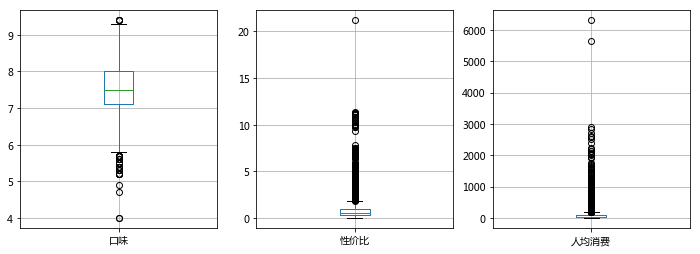

In [17]:

data1 = df1[['类别','口味','环境','服务','人均消费']]               # 获取需要的数据
data1.dropna(inplace=True)                                          # 去除空值
data1 = data1[(data1['口味']>0)&(data1['人均消费']>0)]              # 去除不可理的数据   

# 计算性价比 
data1['性价比'] = (data1['口味'] + data1['环境'] + data1['服务']) / data1['人均消费']


fig,axes = plt.subplots(1,3,figsize=(12,4))                          # 查看数据的分布
data1.boxplot(column=['口味'],ax=axes[0])
data1.boxplot(column=['性价比'],ax=axes[1])
data1.boxplot(column=['人均消费'],ax=axes[2])

def f1(data,col):                                                    # 创建函数 → 删除异常值
    q1 = data[col].quantile(q=0.25)
    q3 = data[col].quantile(q=0.75)
    iqr = q3 - q1
    t1 = q1 - 3*iqr
    t2 = q1 + 3*iqr
    return data[(data[col] > t1)&(data[col] < t2)][['类别',col]]

data_kw = f1(data1,'口味')
data_xjb = f1(data1,'性价比')
data_rj = f1(data1,'人均消费')

def f2(data,col):                                                   # 创建函数 → 计算标准化处理
    col_name = col+'_norm'
    data_gp = data.groupby('类别').mean()
    data_gp[col_name] = (data_gp[col] - data_gp[col].min())/(data_gp[col].max()-data_gp[col].min())
    data_gp.sort_values(by=col_name,inplace=True,ascending=False)
    return data_gp

data_kw_score = f2(data_kw,'口味')
data_rj_score = f2(data_rj,'人均消费')
data_xjb_score = f2(data_xjb,'性价比')

# 数据合并
data_final = pd.merge(data_kw_score,data_rj_score,left_index=True,right_index=True)
data_final = pd.merge(data_final,data_xjb_score,left_index=True,right_index=True)

print(data_final.head())

In [26]:
# 制作散点图、柱状图
# x轴为“人均消费”，y轴为“性价比得分”，点的大小为“口味得分”

from bokeh.models import HoverTool
from bokeh.palettes import brewer
from bokeh.models.annotations import BoxAnnotation
from bokeh.layouts import gridplot

data_final['size'] = data_final['kw_norm'] * 40                                             # 添加size字段
data_final.index.name = 'type'
data_final.columns = [['kw','kw_norm','price','price_norm','xjb','xjb_norm','size']]        # 将中文改为英文  

source = ColumnDataSource(data_final)                                                       # 创建ColumnDataSource数据
hover = HoverTool(tooltips=[('餐饮类型','@type'),                                           # 设置标签显示内容
                            ('人均消费','@price'),
                            ('性价比','@xjb_norm'),
                            ('口味','@kw_norm')])

result = figure(plot_width=800,plot_height=250,                                             # 构建绘图空间
                title='餐饮类型得分情况',
                x_axis_label='人均消费',y_axis_label='性价比',
                tools=[hover,'box_select,reset,xwheel_zoom,pan,crosshair'])

result.circle(x='price',y='xjb_norm',
              source=source,
              line_color='black',
              line_dash=[6,4],fill_alpha=0.6)
price_mid = BoxAnnotation(left=40,right=80,fill_alpha=0.1,fill_color='navy')                # 设置人均消费中间价位区间
result.add_layout(price_mid)
result.title.text_font_style = 'bold'
result.xgrid.grid_line_dash=[6,4]
result.ygrid.grid_line_dash=[6,4]
                                                                                            # 绘制柱状图
data_type = data_final.index.tolist()                                                       # 提取横坐标
kw = figure(plot_width=800,plot_height=250,                                                 # 柱状图1
            title='口味得分',
            x_range=data_type,
            tools=[hover,'box_select,reset,xwheel_zoom,pan,crosshair']
            )
kw.vbar(x='type',top='kw_norm',source=source,width=0.9,alpha=0.8,color='red')
kw.xgrid.grid_line_dash=[6,4]
kw.ygrid.grid_line_dash=[6,4]


price = figure(plot_width=800,plot_height=250,                                              # 柱状图2
               title='人均消费得分',
               x_range=kw.x_range,
               tools=[hover,'box_select,reset,xwheel_zoom,pan,crosshair'])
price.vbar(x='type',top='price_norm',source=source,width=0.9,alpha=0.8,color='green')
price.xgrid.grid_line_dash=[6,4]
price.ygrid.grid_line_dash=[6,4]

p = gridplot([[result],[kw],[price]])                                                       # 组合图表
show(p)